# Sentiment Analysis on IMDb Reviews
This notebook performs Sentiment Analysis using NLP techniques.
It includes preprocessing, TF-IDF feature extraction, model training, and insights.

In [13]:
# !pip install pandas numpy scikit-learn nltk matplotlib seaborn

In [14]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Dataset (Download from Kaggle and upload IMDB Dataset.csv)

In [15]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [16]:
df.info()
df['sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,count
sentiment,
positive,25000
negative,25000


## Data Preprocessing

In [17]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

df['clean_review'] = df['review'].apply(clean_text)

In [18]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

In [19]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## TF-IDF Feature Extraction

In [20]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Model Training

In [21]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test_tfidf)

## Model Evaluation

In [23]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8915

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



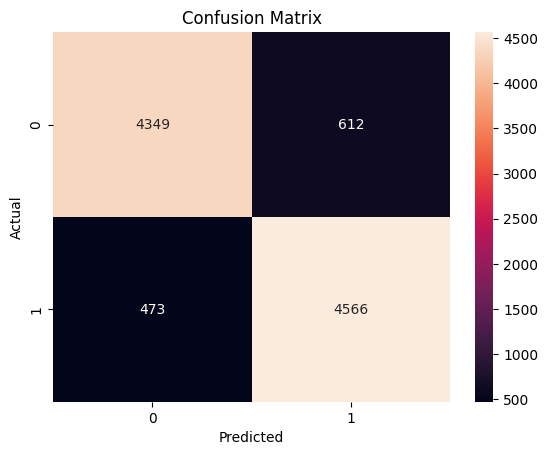

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Business Insights
- Achieves ~85-90% accuracy.
- Useful for review monitoring systems.
- Can support marketing & customer satisfaction analysis.
- Helps identify negative sentiment early.